# DIT821 Software Engineering for AI systems

DIT821 labs are derived from excercises from Coursera Machine Learning course. 

<div class="alert alert-block alert-warning">
You are supposed to solve them yourself and submit the solutions. Further, you will be asked individually to explan the labs, in particuar the parts that you have written. The labs will be approved upon sucssesful correct submission and discussion. 
</div>

* Name, e-mail: Adam Frison, gusfrisoad@student.gu.se
* Name, e-mail: Carl Andreasson, gusandcafg@student.gu.se
* Name, e-mail: Edvin Danielsson, gusdanieed@student.gu.se
* Name, e-mail: Felix Mertala, gusmertfe@student.gu.se
* Name, e-mail: Marcus Andersson, gusqanuqma@student.gu.se

# Programming Exercise 9: Feature Engineering

In this lab exercise, you will prepare your data in a way that it is suitable for a machine learning algorithm. You will achive this by first exploring the data and performing feature transformations on provided dataset of house price prediction ML problem. To do this exercise, you will need to have installed Python and required packages of external modules. Check installation guide document for more installation details:<br><br>

- **scipy**: For advanced mathematical routines <br>
- **numpy**: For N-dimensional array manipulation <br>
- **pandas alias np**: For data analysis and data structures in DataFrames (i.e. tabular data with rows and columns)<br>
- **matplotlib.pyplot alias plt**: For 2D plotting <br>
- **sklearn**: For machine learning algorithms <br>
- **Neptune.ai**: For experiment management(Optional)<br> 


## Files included in this exercise:

- **Ames_Housing_dataset**
    - train.csv 
    - data_description.txt 

## Where to get help:

- **Working with Pandas**:
    - Load data: <https://pandas.pydata.org/pandas-docs/stable/reference/io.html#flat-file>
    - DataFrame: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html>
    - Explore data: <https://pandas.pydata.org/pandas-docs/stable/reference/io.html#flat-file>
    
- **Working with Pandas and Matplotlib**: <https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html>
    - Visualize data e.g., scatterplot: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html>
    - Scatter Matrix: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html>
    -  Pivot table: <https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html> 
- **Working with Seaborn**: <https://seaborn.pydata.org/tutorial.html>  
    - Heatmap: <https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap>
- **Working with sklearn**:
    - train_test_split: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html><br>
    - ML algorithms: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>
    - ML evaluation metrics: <https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error>
- **(Optional) Working with Neptune.ai**:
    - ML experiment management: <https://docs.neptune.ai/you-should-know/logging-metadata>
    

In [48]:
# used for manipulating directory paths
import os

# For N-dimensional array manipulation
import numpy as np

# For advanced mathematical routines
import scipy

# Plotting library
import matplotlib.pyplot as plt

# For data analysis and data structures in DataFrames 
import pandas as pd

# For data visualization
import seaborn as sns

# For machine learning algorithms and evaluation metrics
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics


# tells matplotlib to embed plots within the notebook
%matplotlib inline


## Submission
For this programming exercise you are required to train a ML model for predicting house prices using Ames Housing Dataset. The following is a breakdown of how each part of this exercise.  
- *Step 1: Load dataset*<br>
- *Step 2: Visualize and explore dataset in order to gain insights*<br>
- *Step 3: Prepare data for ML (data cleaning and feature engineering)*<br>
- *Step 4: Train and evaluate a simple linear regression model*<br>
- *Step 5: Refine model using regularization*<br>


# House Price Prediction

The ML problem is that of predicting house prices based on the provided Ames housing dataset. <br>

## 1 Load Dataset
In this first task, you will load dataset `train.csv` to a Panda's DataFrame object named `train_house_data`. You will then confirm that the data is loaded by looking at data structure. 

> **TASK 1.** Write code to load data using Pandas `read_csv()`, which will return a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) that you can explore. To briefly look at data structure, check and print:

> - Data size with `DataFrame.shape` 

> - Data summary with `DataFrame.info()`

> - First five rows with `DataFrame.head()`

> - Summary of numeric features values (mean, min, max, std etc) with `DataFrame.describe()`

> - Values of a categorical feature (Street) with `DataFrame['column'].value_counts()` 


In [49]:
# Task 1 Load dataset 

## Implement a function to load dataset
def loadDataset(dirname, filename):
     """
     Loads dataset from a csv file
    
     Parameters
     ----------
     dirname: String
        The path to the directory containing the dataset.
        
     filename: String
        The name of the file containing dataset .
    
     Returns
     -------
     df : Object
        A pandas dataframe.
    
     """
    # ====================== YOUR CODE HERE ======================
    
     path = dirname + filename
     df = pd.read_csv(path)
     return df
    
    # ==================================================================

In [50]:
# Task 1 load dataset

## Create a Panda's dataframe called 'house_data_df' by executing the load dataset function
house_data_df = loadDataset('Data/','train.csv') # modify this if necessary

## Brielfy look at the data using 'shape', 'head', 'info' etc, functions. 
## Comment out each function after implementation except for shape
# ====================== YOUR CODE HERE ======================
# Print DataFrame shape 
print(house_data_df.shape)
# Print DataFrame info
print(house_data_df.info)
# Print DataFrame head with 10 rows
print(house_data_df.head(10))
# Print DataFrame describe 
print(house_data_df.describe)
# Print the count of values in 'Street' using value_counts() 
print(house_data_df.value_counts('Street'))
# ==================================================================


# Drop the 'Id' column 
# ====================== YOUR CODE HERE ======================
house_data_df.drop(columns='Id', axis=1, inplace=True)
# ==================================================================

# print the new dataframe shape
print('Shape after dropping ID: \n', house_data_df.shape)



(1460, 81)
<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     Lan

There are 1460 instances in the train dataset. Notice that some features have missing values that need to be take care of if you are to use the feature in your model. For example, 'Alley' feature has only 91 non-null values, meaning that 1369 instances are missing this value. <br><br>
You can also already see that 37 features are numeric (38 if Id is not removed) and 43 of type object, which means they can hold any type of Python object. However since you loaded the data from a CSV file you can speculate they are text features. Also, when you look at the top five rows, you can notice that feature values of type object (e.g., MSZoning and Street) are repetitive, which means they are probably categorical features. 
You can find how many categories exist by using the Panda's `value_counts()` method. You can use Panda's `describe()` to show descriptive statitstics summary of the numerical features, such as mean. Notice that the `describe()` method excludes NaN values e.g, 'MasVnrArea' feature. See 1.2 for help


## 2 Discover and Visualize Dataset to Gain Insights  

So far you have briely looked at the data to get a general understanding of the kind of data you are manupulating. This is also a good way to inspect your data to find abnormalities and peculiarities. To help you achieve in-depth view of data, you will be doing some plotting as you explore the data. There are variety of ways to visualize data and gain insights, such as Histograms and Scatterplots. `Matplotlib.pyplot` module will be used for visualizations.

> **TASK 2.** Write code to visualize relationships of features (remember to give names to title, xlable and ylable):

> - Histogram of DataFrame using `DataFrame.hist()`

> - Correlations of the target feature'SalePrice' with others features using `DataFrame.corr()` 

> - Scatterplot to visualize correlations of few selected features ('SalePrice', 'OverallQual','GrLivArea', 'GarageArea', 'TotalBsmtSF', 'LotArea') using `DataFrame.scatter_matrix()` 

> - Scatterplot of 'SalePrice' and ' GrLivArea' using `plt.scatter()`

> - Pivot table using `DataFrame.pivot_table()` between target feature 'SalePrice' and categorical features (a)SaleCondition (b) Neighborhood and (c) MSZoning 

> Make sure you are able to inteprete the results and can give a brief explanation of the visualizations

### Overview  with Histograms

You can plot a histogram of each numerical feature to show number of instances for a given value range. `DataFrame.hist()` plots histogram over whole dataset, however in other cases you can choose to plot histogram of individual numerical feature.

Based on these histograms, take note that features have very different scales (x-axis) and that some features have 'tail-heavy' skewed ditribution. You will now proceed to explore relationship between features.


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

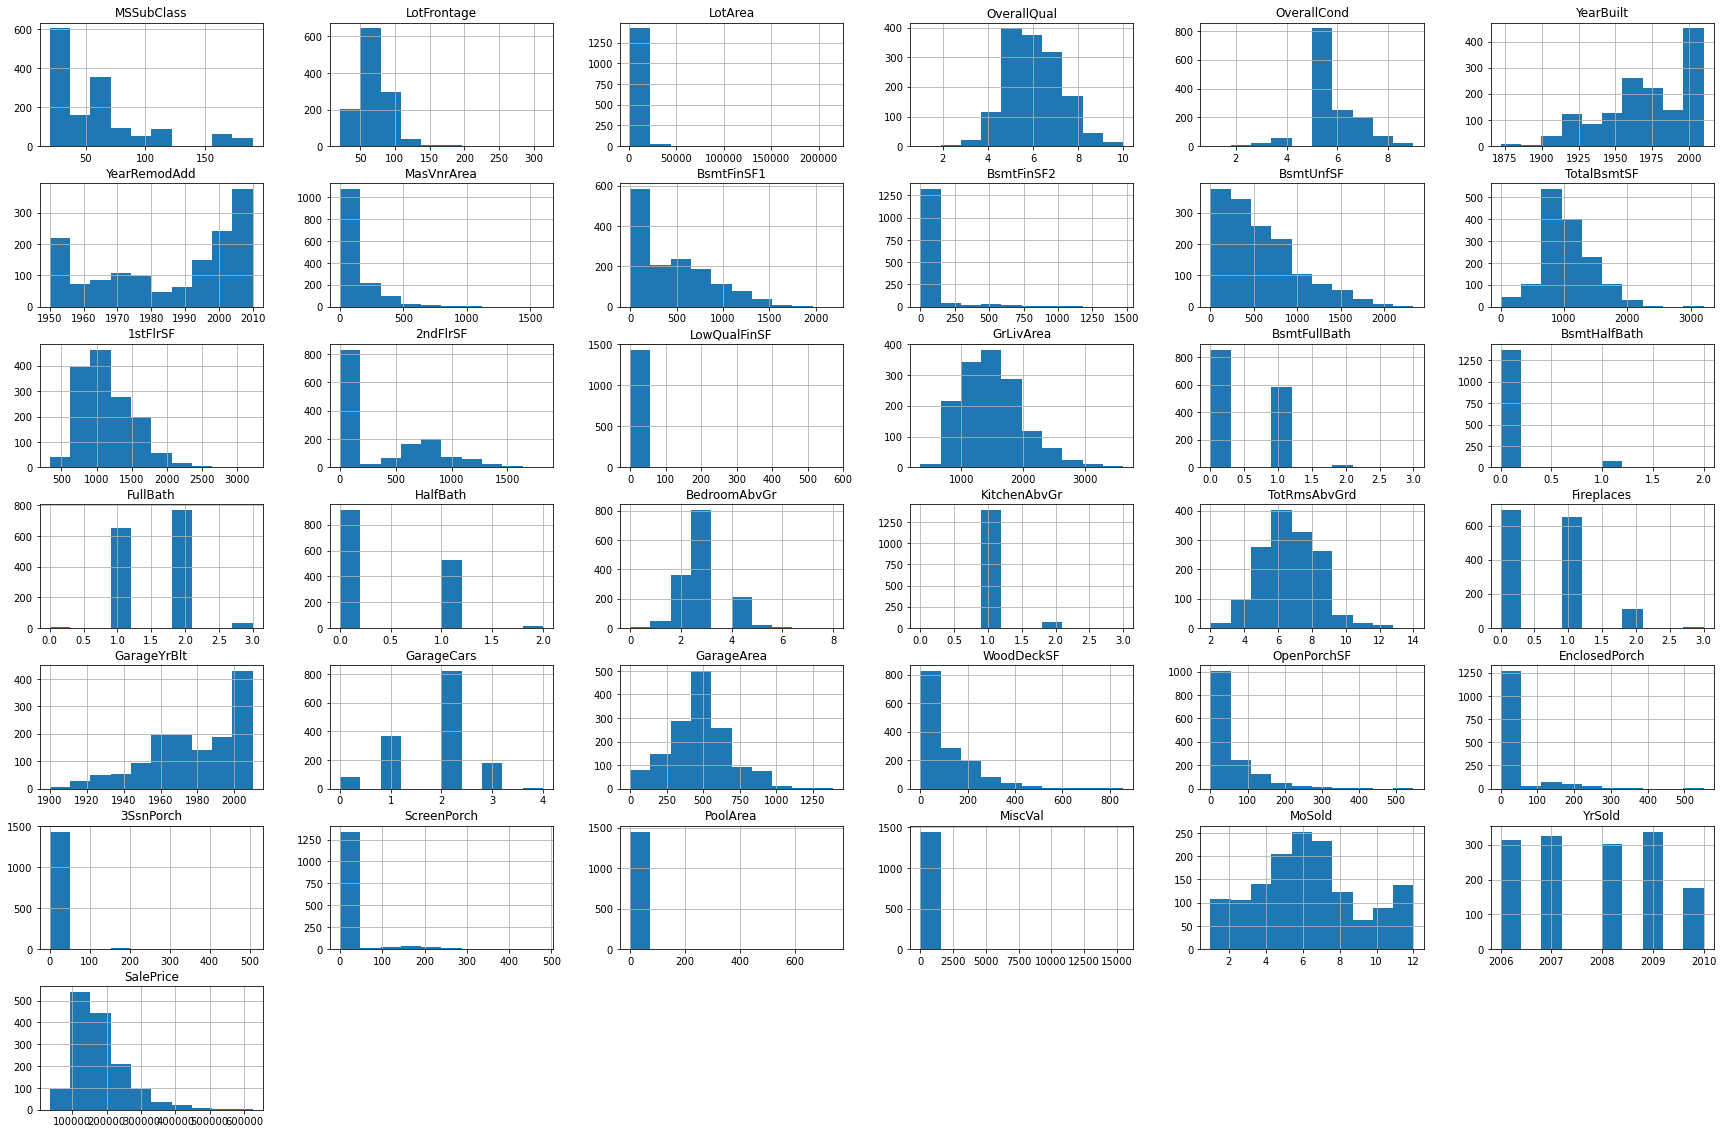

In [157]:
## Task 2 Visualize data to gain insights (Histograms)

# Plot histogram of numerical features using DataFrame.hist(figsize=(30,20)). 
# Notice, in the later, DataFrame is the created house_data_df
#  ===== YOUR CODE HERE ==========
df = pd.DataFrame(data=house_data_df)
df.hist(figsize=(30,20))

# ==================================================================

### Looking for Correlations

Since the dataset is not too large, you can compute correlation coefficient between every pair of features using Panda's `corr()` method. Correlations coefficients measures linear correlations and ranges from -1 to 1, whereby values close to 1 mean strong positive correlation and correlations close to zero mean there is no linear correlation. 

Using Panda's `corr()`, you need to examine the correlation between the features and the target 'SalePrice'. You will notice that the target 'SalePrice'  variable is highly correlated with features like OverallQual, GrLivArea, GarageCars, GarageArea and TotalBsmtSF among others. 


In [96]:
## Task 2 Visualize data to gain insights  (Correlations)

# Check correlation of 'SalePrice' with others features using DataFrame.corr()
# Start by assigning the corrections (DataFrame.corr()) to a new object 'feature_corr'
#  ===== YOUR CODE HERE ==========

feature_corr = df.corr()


# Then, print correlation of 'Sale Price' with other features from 'feature_corr' and sort  in descending order
#  ===== YOUR CODE HERE ==========

# print(data)
print(feature_corr['SalePrice'].sort_values())


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

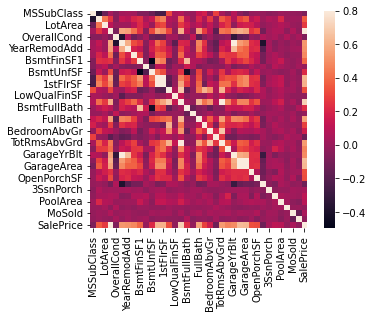

In [105]:
# Using Seaborn library, generate a heatmap based on 'feature_corr' from the previous cell
#  ===== YOUR CODE HERE ==========

sns.heatmap(feature_corr, square=True)

### Overview with Scatterplots

You can use scatterplot to further explore data by checking the correlation between numeric features. Pandas' `pd.plotting.scatter_matrix()` plots every numerical feature against every other numerical feature. Since the dataset has several features you will only explore few promising features (with high correlation) namely: SalePrice, OverallQual, GrLivArea, GarageArea, TotalBsmtSF, and LotArea


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='LotArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel

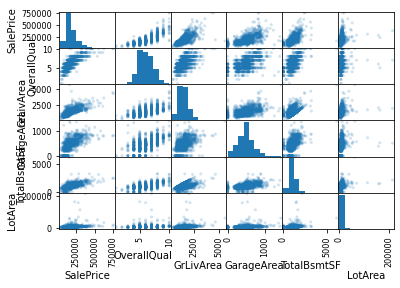

In [106]:
## Task 2 Visualize data to gain insights (Scatterplots)

# Plot scatterplots to visualize correlations of few selected features 
# Start by assigning the specified features to list called 'scatter_features'. 
#  ===== YOUR CODE HERE ==========

scatter_features = pd.DataFrame(df, columns=[ 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF',  'LotArea'])


# Then, plot the scatter matrix using pd.plotting.scatter_matrix() function
# Appropriately pass the parameters that utilizes above 'scatter features' to the function
#  ===== YOUR CODE HERE ==========
pd.plotting.scatter_matrix(scatter_features, alpha=0.2)


From the scatterplot you can confirm strong positive correlations with the upward trends and notice that 'OverallQual' is a categorial feature. Among the most promising feature to predict 'SalePrice' is GrLivArea. Use `plt.scatter()` to further get detailed view of the correlations.


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>]],
      dtype=object)

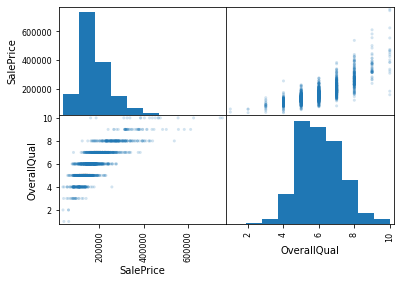

In [107]:
## Task 2 Visualize data to gain insights (scatterplot-detailed)

# Plot a scatterplot of SalesPrice and GrLivArea
# ===== YOUR CODE HERE ==========
sp_detail = pd.DataFrame(df, columns=[ 'SalePrice', 'OverallQual'])
pd.plotting.scatter_matrix(sp_detail, alpha=0.2)


Based on correlation results, you have used scatterplot to further explore'GrLivArea' and 'SalePrice' features that revealed positive correlation through the upward trend. At the same time, outliers can be identified that show relatively low prices for large house sizes. Outliers are observed in houses with over 4000 GrLivArea as they contain either extremely high prices or low prices for such big area sizes.<br>

These outliers need to be removed to prevent your ML algorithm from learning from them. Therefore, you will clean the data by removing outliers and only train on houses with less than 4000 GrLvArea. (Notice that often you will need to assess the impact of removing outliers prior to deciding their removal)

*Notice:* `DataFrame.loc[]` allows you to access a group of rows and columns by label(s).


In [108]:
# Removing houses with GrLivArea of more than 4000, as these contain outliers
df_outlier = house_data_df.loc[house_data_df['GrLivArea'] > 4000]
house_data_df = house_data_df.drop(df_outlier.index)
print(house_data_df.shape)


(1456, 80)


### Relationships with Pivot Table

A pivot table is a table of statistics that summarizes the data of a more extensive table. In our data, a categorical feature 'OverallQual' has unique values in the interval of 1 to 10 inclusive.<br><br>
You can create a pivot table to investigate the relationship between this categorical feature (e.g., OverallQual) and SalePrice. This is accomplished with Panda's `pivot_table()` by setting index='OverallQual'and values='SalePrice' and choosing to look at the median. Use `Series.plot()` to visualize the pivot table more easily by creating the bar plot. 


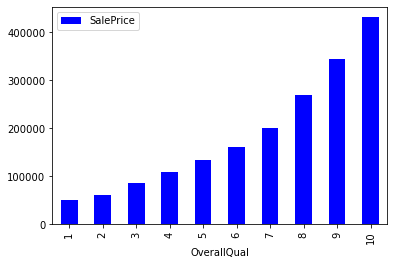

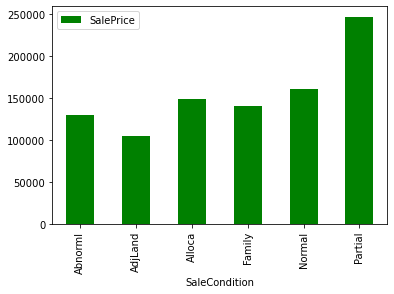

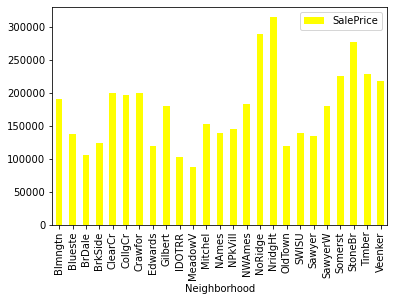

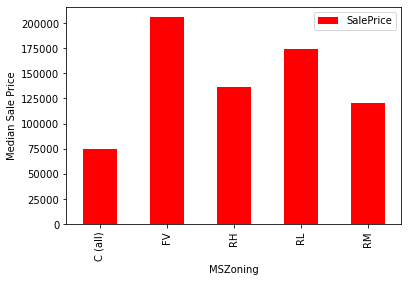

In [109]:
## Task 2 Visualize data to gain insights (Pivot table)

# Plot pivot tables using DataFrame.pivot_table() 

# Pivot table to investigate relationship of OveralQual and SalePrice
quality_pivot = house_data_df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='Overall Quality',color='blue')

# Pivot table to evaluate relationship of SaleCondition and SalePrice
# ===== YOUR CODE HERE ==========

# df.pivot_table(index=['SaleCondition'], columns=['SalePrice'],fill_value=0)

quality_pivot = house_data_df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',color='green')

# Pivot table to evaluate relationship of Neighborhood and SalePrice
# ===== YOUR CODE HERE ==========

quality_pivot = house_data_df.pivot_table(index='Neighborhood', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',color='yellow')


# Pivot table to evaluate relationship of MSZoning and SalePrice
# ===== YOUR CODE HERE ==========

quality_pivot = house_data_df.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',color='red')


plt.ylabel('Median Sale Price')
plt.show()


## 3 Prepare Dataset for Machine Learning 

The exploration stage is an iterative process. In the beginning, the goal is to gain some first insights that is sufficiently for developing a first (ideally, reasonably good) prototype and then refine the exploration in the next iterations. 

The previous tasks have given you some insights into the dataset, which you may use to prepare for ML algorithm. You were able to identify and remove some outliers and to see some interesting correlations between the target and the other features. Furthermore, histograms showed tail-heavy distribution 'skew' requiring transformations, and transformations of non-numeric features have so far not been explored. You will now write code to prepare dataset for ML algorithms.


> **TASK 3:** Overview:

> - Clean and engineer numeric features (handle missing values and perform log transformation). See Task 3.1 for more details

> - Clean and engineer categorical features (handle missing values, perform one-hot encoding). See Task 3.2 for more details

### Separating features and target variable

First, since we do not necessarily need to apply the same transformations to predictors and target feature, we separate out the target feature. We will use Panda's `drop('column', axis =1)`,  which creates a copy of the DataFrame and drops the specified column without affecting the original DataFrame.

We can separate features and the target variable using `DataFrame.drop('column', axis =1)` for features DataFrame object and `DataFrame['column'].copy()` for target DataFrame object. We will use  `house_data_features` and `house_data_target` as names of the new DataFrame objects.


In [111]:
# Separating features and target from house dataset 
house_data_features = house_data_df.drop(columns='SalePrice', axis =1) 
house_data_target = house_data_df["SalePrice"].copy() 
house_data_target.columns = ['SalePrice']

# Print DataFrame shape of features and target variable
print('Shape of features: \n', house_data_features.shape)
print('Shape of target: \n', house_data_target.shape)
house_data_features.info()

Shape of features: 
 (1456, 79)
Shape of target: 
 (1456,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64 

### Data Cleaning - *Handling missing values*

Missing values in our data table are blank spaces and placeholder strings, e.g., ''Not A Number (NaN)''. Most computational tools are unable to handle such missing values or would produce unpredictable results if we simply ignored them. Therefore, it is crucial that we take care of the missing values before we proceed with further analyses. 

In this exercise, you can accomplish handling of missing values by using Panda's `DataFrame.dropna()`, `DataFrame.drop()` and `DataFrame.dropfillna()`. To get an overview of missing values in current train dataset you will use the `isnull()` to return a DataFrame with Boolean values that indicate whether data is missing. The `sum()` can further be used to return the number of missing values per column. 

You typically have three options to deal with missing values:

- Get rid of the instances with missing values with Panda's `dropna()`

- Get rid of the whole feature with Panda's `drop()`

- Set the missing values to some value(zeros, mean, median, etc) with Panda's `fillna()`

Notice the following: In real-world deployment contexts,  you cannot be sure there will not be any missing values in new data after training and deploying a ML model. Therefore, you need to apply handling of missing value not just to the current missing values. However, in this exercise we only handle missing values in existing data.


In [112]:
# Function to check for missing values
def checkMissing(df):
    """
    Checks missing value in a panda's dataframe and returns count
    
    Parameters
     ----------
    df: Object
        A panda's DataFrame to check for missing values
        
    Returns
     ----------
    missing: Object
            A panda's object with count of missing values
            
    """
    missing_count = df.isna().sum().sort_values(ascending= False)
    missing_count = missing_count[missing_count != 0]
    return missing_count
    

# Checking for missing values in features
print(checkMissing(house_data_features))

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

PoolQC          1451
MiscFeature     1402
Alley           1365
Fence           1176
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
Shape of features (1456, 79): 
 (1456, 79)
Shape of target (1456,): 
 (1456,)


## 3.1 Numeric Features (Data Cleaning and Feature Engineering)

As you start to consider features, you can check numeric features using Panda’s `DataFrame.select_dtypes()` to return subset of columns matching the specified data types. To specify numeric datatype pass `include=[np.number]` which uses numpy datatype function.

You will process numeric features by first handling the missing values, and then handle skewness with for example log-transformation or perfom feature rescaling.


>**TASK 3.1** Write code to:

> - Create a DataFrame object from `house_data_features` DataFrame object to contain numeric features `numeric_features`. You can use  `DataFrame.select_dtypes()` and passing `include=[np.number]` to get numeric features. 

> - Check and handle missing values of numeric features. Check missing values in dataset using `DataFrame.isnull().sum().sort_values(ascending=False)`. See 3.1.1 handling missing values of numeric features for implementation details

> - Engineer the numeric features. See 3.1.2 Processing of numeric features for implementation details.

In [158]:
## Task 3.1 Numeric features (Data cleaning - Handling missing values)

# Create a new object 'numeric_features' from house_data_features that contains only numeric features
# Print the shape of 'numeric features' dataframe object. Expected shape is (1456, 36)
# ===== YOUR CODE HERE ==========

print(house_data_features.shape)
numeric_features = house_data_features.select_dtypes('number')


print(numeric_features.shape)

# Print numeric_features with missing values using the 'checkMissing()' function created above 
# ===== YOUR CODE HERE ==========

checkMissing(numeric_features)


(1456, 80)
(1456, 36)


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

### 3.1.1 Handling missing values of numeric features

The dataset contains missing values for 'LotFrontage', 'GarageYrBlt' and 'MasVnrArea. You will proceed to handle the missing values in the following ways:

- LotFrontage: fill median value (sort data by ‘Neighborhood’ before imputing median). Use Panda's `DataFrame.groupby()` and `DataFrame.transform()`
- Otherwise fill missing values with 0 using `fillna()`


In [159]:
## Task 3.1.1 Handling missing values of numeric features

# Fill nulls for 'LotFrontage' with median value calculated after grouping by 'Neighborhood'
# ===== YOUR CODE HERE ==========

house_data_features['LotFrontage'] = house_data_features['LotFrontage'].fillna(house_data_features.groupby('Neighborhood')['LotFrontage'].transform('median'))
# Fill nulls for 'GarageYrBlt','MasVnrArea' with 0
# ===== YOUR CODE HERE ==========

house_data_features['GarageYrBlt'] = house_data_features['GarageYrBlt'].fillna(0)
house_data_features['MasVnrArea'] = house_data_features['MasVnrArea'].fillna(0)

# Check that features LotFrontage, GarageYrBl and MasVnrArea are no longer in missing value list 
print(checkMissing(house_data_features))

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)


BsmtFinType1    37
MasVnrType       8
dtype: int64
Shape of features (1456, 79): 
 (1456, 80)
Shape of target (1456,): 
 (1456,)


### 3.1.2 Feature engineering of numeric features (log-transform)

When performing regression, sometimes it is good to apply log-transformation to the target variable, in particular, when it is skewed. Importantly,  the predictions generated by the final model  will also be log-transformed; so, you will need to convert the predictions back to the original form later.

You will use numpy's log-transformation function `np.log()` and pass DataFrame object to apply the transformation. You will apply log-transformation to target 'SalePrice' variable. You can use `np.exp()` to reverse the transformation. Check for skeweness before and after log-transformation using Panda's `skew()` function specifically DataFrame.SalePrice.skew()

In [ ]:
## Task 3.1.2 Feature Engineering for Numeric features (log-transformation)

# Check skewness of the target variable
print("Skew (no log transform): 1.565959 \n", house_data_target.skew())

# Apply log-transform on target feature 'SalePrice' using 'np.log()' function (Execute only once)
# ===== YOUR CODE HERE ==========
house_data_target = np.log(house_data_target)



# Check skewness of the target variable after log-transform
print("Skew (log transform): 0.065448 \n", house_data_target.skew())

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

### 3.2 Categorical Features (Feature Engineering)

Since many machine learning algorithms prefer to work with numbers, you will covert categories of categorical features from text to numbers. To do so, you will use Pandas one-hot encoding `get_dummies()`. You will first need to handle missing data of categorical features. Often, it is better to gather domain knowledge in order to make the best decision when dealing with missing data of categorical features. In our exercise, the Ames Housing documentation can help in understanding the missing values. For example, *PoolQC* features the value is NaN when PoolArea is 0, meaning  there is no Pool.


> **TASK 3.2** Write code to:

> - Handle numeric features that were deemed categorical by changing their dttype to object using `DataFrame[col].apply(str)`

> - Create a DataFrame object from `house_data_features` DataFrame object to contain categorical features `categorical_features`. Use  `DataFrame.select_dtypes()` and passing `exclude=[np.number]` to get categorical features. Similar to first part of Task 3.1

> - Check and handle missing values of categorical features.  Check missing values in dataset using `DataFrame.isnull().sum().sort_values(ascending=False)`. Handle missing values for categorical features (PoolQC,MiscFeature, Alley, Fence, FireplaceQu, GarageCond, GarageType, GarageFinish, GarageQual,BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, MasVnrType) by filling 'None'. You remove the one observation with missing value for Electrical feature.

> - Perform binning and one-hot encoding for categorical features. See 3.2.2. Processing of categorical features (binning and one-hot encoding) for implementation details.


In [114]:
## Task 3.2 Feature Engineering for Categorical features (Handling missing values)

# Transform some numerical features that are actually categorical
for col in ['OverallQual','MSSubClass','OverallCond']:
    house_data_features[col].apply(str)

# Create a new object 'categorical_features' from house_data_features that contains only categorical features
# ===== YOUR CODE HERE ==========
categorical_features = house_data_features.select_dtypes(exclude=["number","bool_"])


# Print missing values in categorical features using the checkMissing() function
# ===== YOUR CODE HERE ==========
checkMissing(categorical_features)


print("Numeric features shape (1456, 36): \n", numeric_features.shape)
print("Categorical features shape (1456, 43): \n", categorical_features.shape)
print("House data features shape (1456,79): \n", house_data_features.shape)

Numeric features shape (1456, 36): 
 (1456, 36)
Categorical features shape (1456, 43): 
 (1456, 43)
House data features shape (1456,79): 
 (1456, 79)


### 3.2.1 Handling missing values of categorical features 

Several categorical features have missing value. You will handle values of text and categorical as follows as noted in the data description:

- PoolQC: NA means 'no pool', thus fill "None"

- MiscFeature: NA means 'no misc feature', thus fill "None"

- Alley: NA mean 'no alley access', thus fill "None"

- Fence: NA means 'no fence', thus fill "None"

- FireplaceQu: NA means 'no fireplace', thus fill "None"

- GarageCond, GarageType, GarageFinish and GarageQual: fill "None"

- BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual: fill "None", since NaN means no basement

- Electrical: Only one observation with NAN, you can fill it with 'SBrkr'(highest mode value) or remove observation with missing value, using `dropna(subset=['column'])`. If you choose to remove the observation you need to do it before separating features and target


In [115]:
## Task 3.2 Feature Engineering for Categorical features (Handling missing values)

# Fill nulls for the missing values in the specified categorical features of the "house_data_features" 
# according to the data description above (3.2.1).
# Note the special description for feature 'Electrical'.
# ===== YOUR CODE HERE ==========
#house_data_features['PoolQC','MiscFeature'] = house_data_features['PoolQC','MiscFeature'].fillna('None')
house_data_features[['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType',
                           'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual']] = house_data_features[[
    'PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType',
                           'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual']].fillna('None')

house_data_features['Electrical'] = house_data_features['Electrical'].fillna('SBrkr')
# Check that there are no nulls in the dataframe 
print(checkMissing(house_data_features))

LotFrontage     259
GarageYrBlt      81
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
dtype: int64


### 3.2.2 Processing of categorical features (binning and one-hot encoding)
For categorical features, you may want to use **binning** and **one-hot encoding** to make transformations useful for building the model. You can do this by using Panda's `DataFrame.replace()` and `DataFrame.get_dummies()` respectively.

When using one-hot encoding, it is important to remember that for a number of categories of a categorical feature you will create a set of new features equal to the number of its categories. In order not to increase the number of new features, you will perform binning on selected categorical features. Since some categorical features contain information in their ordering set we can use binning to preserved their ordering based on value range. Use binning and convert values of 'OverallQual and OverallCond' features into the following bins: Poor(1-2), Fair(3), Average (4-5), Good(6-7) and Excellent (8-10).


In [141]:
## Task 3.2 Feature Engineering for Categorical features (one-hot encoding)

# Print the shape of dataset before one-hot encoding
print('Shape of features before one-hot encoding (1456,79):\n', house_data_features.shape)


# Perform binning and convert values of 'OverallQual and OverallCond' features
# ===== YOUR CODE HERE ==========
house_data_features.loc[house_data_features['OverallQual'].between(1, 2), 'grade'] = 'Poor'
house_data_features.loc[house_data_features['OverallQual'].between(3,3), 'grade'] = 'Fair'
house_data_features.loc[house_data_features['OverallQual'].between(4, 5), 'grade'] = 'Avrage'
house_data_features.loc[house_data_features['OverallQual'].between(6, 7), 'grade'] = 'Good'
house_data_features.loc[house_data_features['OverallQual'].between(8, 10), 'grade'] = 'Excellent'

a= house_data_features.grade.value_counts()
print(a)

house_data_features.loc[house_data_features['OverallCond'].between(1, 2), 'grade'] = 'Poor'
house_data_features.loc[house_data_features['OverallCond'].between(3,3), 'grade'] = 'Fair'
house_data_features.loc[house_data_features['OverallCond'].between(4, 5), 'grade'] = 'Avrage'
house_data_features.loc[house_data_features['OverallCond'].between(6, 7), 'grade'] = 'Good'
house_data_features.loc[house_data_features['OverallCond'].between(8, 10), 'grade'] = 'Excellent'

b = house_data_features.grade.value_counts()
print(b)

# Perform one-hot encoding on all categorical features
# ===== YOUR CODE HERE ==========

print(pd.get_dummies(house_data_features['grade']))

# Print DataFrame shape of features and target variable
print('Shape of features after one-hot encoding:\n', house_data_features.shape)

Shape of features before one-hot encoding (1456,79):
 (1456, 79)
Good         693
Avrage       513
Excellent    225
Fair          20
Poor           5
Name: grade, dtype: int64
Avrage       875
Good         456
Excellent     94
Fair          25
Poor           6
Name: grade, dtype: int64
      Avrage  Excellent  Fair  Good  Poor
0          1          0     0     0     0
1          0          1     0     0     0
2          1          0     0     0     0
3          1          0     0     0     0
4          1          0     0     0     0
...      ...        ...   ...   ...   ...
1455       1          0     0     0     0
1456       0          0     0     1     0
1457       0          1     0     0     0
1458       0          0     0     1     0
1459       0          0     0     1     0

[1456 rows x 5 columns]
Shape of features after one-hot encoding:
 (1456, 80)


# 4. Train and Evaluate a simple linear model

In this part of the exercise you will build a simple linear regression model using `sklearn`. First use `train_test_split()` from sklearn to create training set and testing set. The train_test_split() returns four objects:
- X_train, a subset of features used for training
- X_test, a subset of features which will be test set
- y_train, the target variable that corresponds to X_train
- y_test, the target variable that corresponds to X_test

Next, you will sent random_state=0 that provides reproduciable results. The test_size parameter tells the function what proportion of the data should be in the test partition. In this exercise, about 20% of the data is devoted to the test set.

To build a simple linear regression model, you will first instantiate a linear regression model object `lr =  LinearRegression()` and then use `lr.fit()` to fit the model on training dataset to learn the weights. You will fit the model using X_train and y_train and then score/evaluate them using X_test and y_test. The weight parameters are stored in `coef_` attribute while the offset or intercept (b) is stored in the `intercept_` attribute.

> **Task 4** Write code to:
> - Create training set and testing set using train_test_split()` from sklearn.model_selection`

> - Train a simple linear regression model from `sklearn.linear_model`

> - Evaluate and print the results of your models with `MSE` or `R^2 score` from `sklearn metrics`

> - (Optional) Track model score using Neptune.al



In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Task 4 Train and Evaluate a simple linear regression model

#  Split dataset in training set (X_train, y_train) and test set (X_test, y_test)
# ===== YOUR CODE HERE ==========


# We decided to use LotArea and SalePrice for task 4.

X = house_data_df["LotArea"]
y = house_data_df["SalePrice"]

X = X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


# Train a simple linear regression model 'lr' with training set
# ===== YOUR CODE HERE ==========
lr =  LinearRegression()

lr.fit(X_train, y_train)



# Third, print model weights(coefficients) and intercept
print("Model intercept (lr.intercept): \n ", lr.intercept_)
print("Model weights (lr.coef_) : \n ", lr.coef_)


Model intercept (lr.intercept): 
  156622.82157630622
Model weights (lr.coef_) : 
  [2.18347367]


**(Optional Task)**

In this optional part of the Lab, you will track some of the model metrics with Neptune.ai. You are required to setup Netptune.ai following the steps below. 
* You need to register a new account from https://neptune.ai/. 
* Install neptune-client library 
* Follow the setup wizard on Netptune.ai to create your first project. 
* Replace the credentials (i.e., project name and api_token) in the next cell with your own credential.




In [146]:
import neptune.new as neptune

# (Optional) Setup Neptune
run = neptune.init(
    project="userid/projectname",# modify
    api_token="", # modify
)  # your credentials

ModuleNotFoundError: No module named 'neptune'

R^2 score on trainig set:  0.0740143553962499
MSE score on trainig set:  73541.92819066129
R^2 score on test set: 0.06749968151964325
MSE score on test set:  74702.40020275713


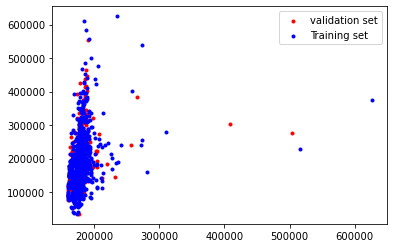

In [155]:
## Task 4 Train and Evaluate a simple linear regression mode

# Use the trained simple model to make predictions 'pred_test' on test set 'X_test' using the trained model 
# ===== YOUR CODE HERE ==========
pred_test = lr.predict(X_test)


# Evaluate model performance using R^2 and mean squared error on training set i.e., pred_train, y_train
# Remember to first make prediction pred_train for training set (X_train) using your simple linear model
# ===== YOUR CODE HERE ==========
pred_train =  lr.predict(X_train)
R_square_train = r2_score(y_train, pred_train)
RSME_train = mean_squared_error(y_train,pred_train,squared=False)

print("R^2 score on trainig set: ", R_square_train)
print("MSE score on trainig set: ", RSME_train)


# Evaluate model performance using R^2 and mean squared error on test set i.e., pred_test, y_test
# ===== YOUR CODE HERE ==========
R_square_test = r2_score(y_test, pred_test)
RSME_test = mean_squared_error(y_test,pred_test,squared=False)

print("R^2 score on test set:", R_square_test)
print("MSE score on test set: ", RSME_test)


# Plot the linear model
plt.scatter(pred_test, y_test, color='red', marker='.', label = "validation set")
plt.scatter(pred_train, y_train, color='blue', marker='.', label = "Training set")
plt.legend()
plt.show()


# (Optional) Using Neptune, track the metrics r_square and RMSE as metadata for both train and test.
# ===== YOUR CODE HERE ==========



# =================================

Interprete the results of `R^2`. The results of the simple linear model may not be ideal and discrepancy between performance on training set and test set is a sign of overfitting. You can work to further improve the model and control complexity by further engineering the features (e.g., by training with few informative features) or employing regularization (e.g., ridge and lasso models). 

# 5. Model refinement with regularization (Optional)

One approach to restricting model overfitting is through regularization, which we have already considered in previous assignments. The following tasks are optional (ungraded), but a useful further exercise. 

## Ridge regression
In Ridge regression, the weights (coefficients) are chosen not only so that they predict well but also their magnituded to be as small as possible. Intuitively this means that each feature should have little effect on the outcome as possible (i.e., little have slope) while predicting well. Ridge regression is implemented in `linear_model.Ridge`. See how well ridge regression does on the problem.

> **Task 5.1** Write code to:
> - Train a ridge regression model `sklearn.linear_model.Ridge`
> - Evaluate and print the results of your models with `R^2 score` from `sklearn metrics.r2_score()`

In [ ]:
## Task 5 Model refinement with regularization (Ridge regression)

## Import required libraries
from sklearn.linear_model import Ridge

ridge = Ridge()

# Train a ridge regression model 'ridge' with training set
# ===== YOUR CODE HERE ==========


# Make predictions 'ridge_pred_train' on train set 'X_train' using the trained model and calculate the R^2
# ===== YOUR CODE HERE ==========
ridge_pred_train = 0 # modify
R_square_train_ridge = 0 # modify

print("R^2 score on trainig set: ", R_square_train)


# Make predictions 'ridge_pred_test' on test set 'X_test' using the trained model and calculate the R^2
# ===== YOUR CODE HERE ==========
ridge_pred_test = 0 # modify
R_square_test_ridge = 0 # modify

print("R^2 score on trainig set: ", R_square_train)


# (Optional) Using Neptune, track the R_square value.
# ===== YOUR CODE HERE ==========


# =================================


Note that you can optimize the Ridge model by changing how much importance should the model should put on simplicity versus training set performance by using alpha parameter. The above ridge model uses the default alpha parameter = 1.0. The optimum setting of the alpha depends on particular dataset, but increasing alpha forces the weights to move toward zero, which decreases training set performance. You can test the later with different values of alpha passed to ridge object when instantiated e.g., `lr_ridge = Ridge(alpha=10)`.


## Lasso 

Lasso is an alternative regularization approach for Ridge. Similar to Ridge, Lasso restricts the coefficients to be close to zero, but in a sightly different way called L1 Regularization. The consequence of L1 Regularization is that when using Lasso, some coefficients are exactly zero. This means some features are ignored entirely, hence some form of automatic feature selection. Having some coefficients exactly zero makes the model easier to interpret and can reveal some important features of the model. Apply lasso to the problem to observe any changes in performance. Similar to Ridge, you can adjust alpha parameter for Lasso model. This means controlling how strongly weights are pushed to zero. 



In [ ]:
## Task 5 Model refinement with regularization (Lasso)

## Import required libraries
from sklearn.linear_model import Lasso

lasso = Lasso()
# Train a Lasso model 'lasso' with training set
# ===== YOUR CODE HERE ==========


# Make predictions 'ridge_pred_train' on train set 'X_train' using the trained model and calculate the R^2
# ===== YOUR CODE HERE ==========
lasso_pred_train = 0 # modify
R_square_train_lasso = 0 # modify

print("R^2 score on trainig set: ", R_square_train_lasso)


# Make predictions 'ridge_pred_test' on test set 'X_test' using the trained model and calculate the R^2
# ===== YOUR CODE HERE ==========
lasso_pred_test = 0 # modify
R_square_test_lasso = 0 # modify

print("R^2 score on trainig set: ", R_square_test_lasso)



# Check the number of features the model is training with
print("Number of features used(Lasso):", np.sum(lasso.coef_!=0))



# (Optional) Using Neptune, track the Lasso model performance.
# ===== YOUR CODE HERE ==========


# =================================

How is the model performing on training set and test set with Lasso? Less scores indicate that you are underfitting and that it is using few number of features.

In [ ]:
# Print all scores
all_scores = {'Regression':[R_square_train, R_square_test], 
              'Ridge':[R_square_train_ridge, R_square_test_ridge], 
              'Lasso':[R_square_train_lasso, R_square_test_lasso]}

score_df = pd.DataFrame(data=all_scores)
score_df


# (Optional) Compare the output of 'score_df' with the score values tracked by Neptune via the its dashboard

In practice, ridge regression is usually the first choice between two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.

The resulting simple linear model is not ideal. You can work to further improve the model by engineering the feature (e.g., by training on few but high predictors) or employing regularization (e.g., ridge and lasso models). 